In [14]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D,Flatten,Dropout

In [15]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [27]:
def plot_input_img(i):
    plt.imshow(X_train[i],cmap='binary')
    plt.title(y_train[i])
    plt.show()

c:\Users\ananya\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


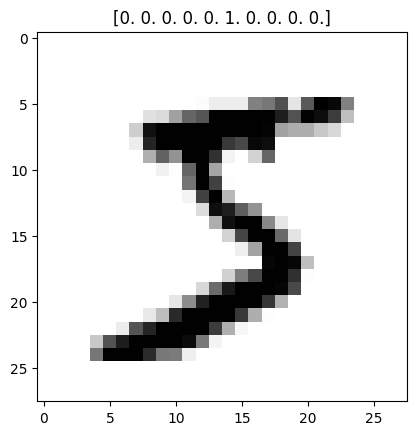

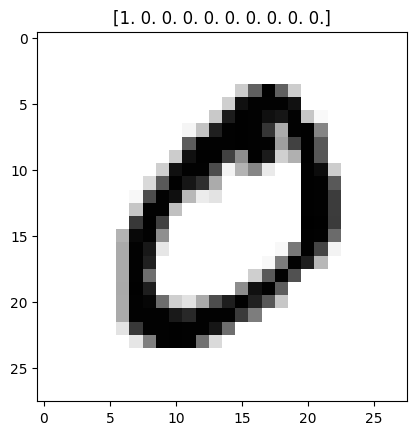

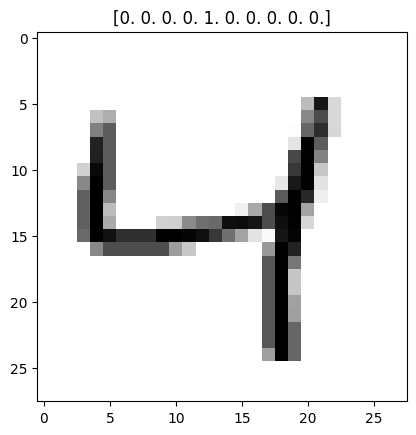

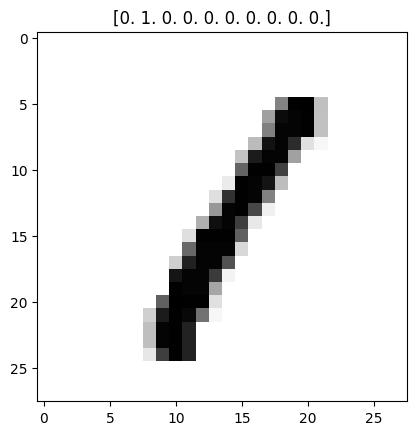

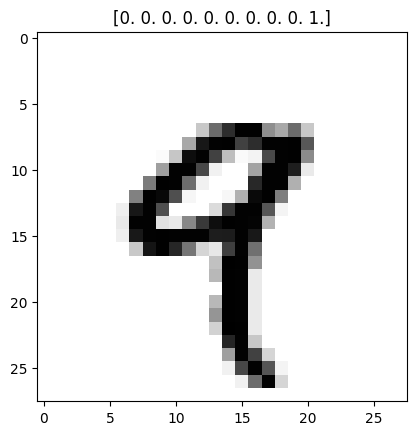

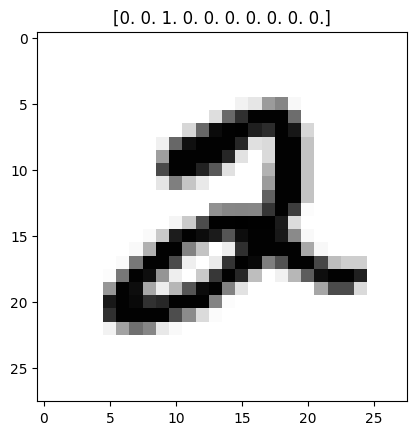

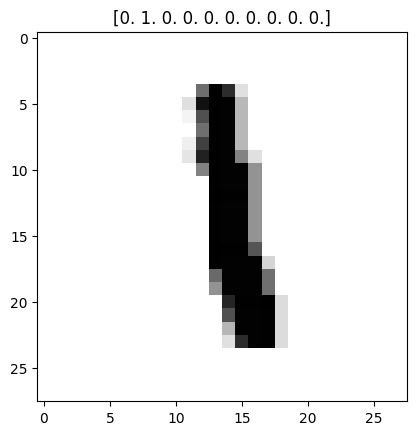

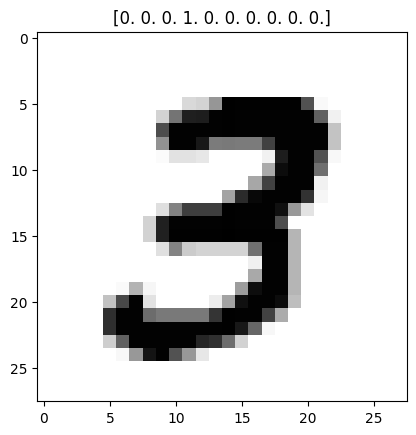

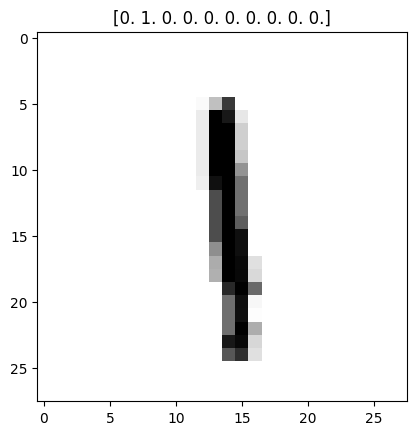

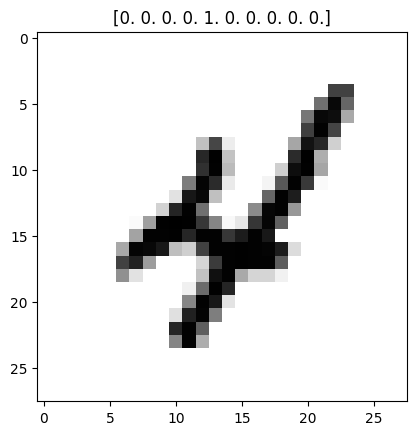

In [28]:
for i in range(10):
    plot_input_img(i)

In [18]:
#Preprocess the images
#Normalizing the image to [0,1] range
X_train=X_train.astype(np.float32)/255
X_test=X_test.astype(np.float32)/255
#Reshape /Expand the dimentions of images to (28,28,1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)


In [19]:
#Convert classes to one hot vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [20]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape =(28,28,1), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation="softmax"))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [22]:
model.compile(optimizer='adam', loss= keras.losses.categorical_crossentropy ,metrics=['accuracy'])



In [23]:
#callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

#Early stopping

es=EarlyStopping(monitor='val_acc',min_delta=0.01, patience=4, verbose=1)
#Model Check point 

mc = ModelCheckpoint("./bestmodel.h5", monitor="val_acc", verbose=1 ,save_best_only=True )

cb=[es,mc]
#model.save('./bestmodel.h5')

In [24]:
his = model.fit (X_train,y_train , epochs=5, validation_split=0.3,)

Epoch 1/5
1313/1313 [==============================] - 45s 32ms/step - loss: 0.2251 - accuracy: 0.9321 - val_loss: 0.0869 - val_accuracy: 0.9737
Epoch 2/5
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0774 - accuracy: 0.9766 - val_loss: 0.0561 - val_accuracy: 0.9833
Epoch 3/5
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0546 - accuracy: 0.9832 - val_loss: 0.0612 - val_accuracy: 0.9807
Epoch 4/5
1313/1313 [==============================] - 40s 31ms/step - loss: 0.0463 - accuracy: 0.9856 - val_loss: 0.0444 - val_accuracy: 0.9869
Epoch 5/5
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0400 - accuracy: 0.9873 - val_loss: 0.0438 - val_accuracy: 0.9861


In [25]:
model_S = keras.models.load_model("./bestmodel.h5")

In [26]:
score = model_S.evaluate(X_test, y_test)
print(f"The model accuracy is {score[1]} ")

313/313 [==============================] - 3s 9ms/step - loss: 0.0341 - accuracy: 0.9888
The model accuracy is 0.9887999892234802 
